# this is used to test matched filter method

In [1]:
# high weight of the RGB and HB
# NGC 411

In [2]:
%matplotlib inline
import astropy.io.fits as fits
from astropy.table import Table
import scipy.ndimage as sn
import numpy as np
import csv
import CoordinateConversion as CC
import matplotlib.pyplot as plt
from matplotlib import cm
# import pandas as pd
import math as m
import PyAstronomy as PA
from PyAstronomy import pyasl as PAP
from scipy import signal
import scipy.optimize as SO
import galpy.util.bovy_coords as gub
import finder as fd

In [3]:
dpath = '/Users/htian/Documents/work/data/MF/'
fn = 'NGC1850.csv'

In [4]:
MAG336, MAG343, MAG438, pq, DEC, RA = np.loadtxt(dpath+fn,skiprows=1,unpack=True,\
                  dtype={'names':('MAG336','MAG343','MAG438','flat','RA','DEC',),\
                        'formats':(float,float,float,float,float,float)},
                                 usecols=(7,8,9,28,33,34))
print(MAG336[0],MAG343[0],MAG438[0], pq[0],RA[0],DEC[0])

15.663 15.684 16.321 0.0 77.23480988 -68.7537697699


In [5]:
print(np.max(MAG336))

27.002


14964


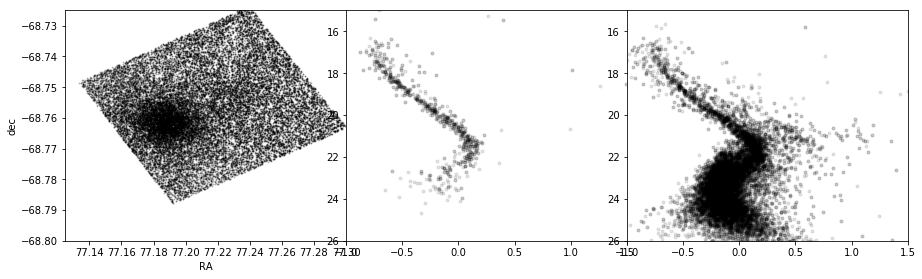

In [6]:
min_ra,max_ra = 77.125,77.3
min_dec,max_dec = -68.8,-68.725
dec_c, ra_c =  -68.76072222222223,77.19079166666667
dec_c0, ra_c0 =  -68.755,77.215
dec_c1, ra_c1 =  -68.745,ra_c*1.0
dec_c2, ra_c2 =  -68.78,ra_c*1.0
dec_LMC,ra_LMC = -69.75611111111111,80.89375000000001
ADIST = np.sqrt((RA-ra_c)**2*np.cos(DEC*m.pi/180)**2+(DEC-dec_c)**2)
ADIST0 = np.sqrt((RA-ra_c0)**2*np.cos(DEC*m.pi/180)**2+(DEC-dec_c0)**2)
ADIST1 = np.sqrt((RA-ra_c1)**2*np.cos(DEC*m.pi/180)**2+(DEC-dec_c1)**2)
ADIST2 = np.sqrt((RA-ra_c2)**2*np.cos(DEC*m.pi/180)**2+(DEC-dec_c2)**2)
ind_in = ADIST<0.002
ind_in0 = ADIST0<0.003
ind_in1 = ADIST1<0.003
ind_in2 = ADIST2<0.003
ind_ring = (ADIST>0.015) & (ADIST<0.03)
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_axes([0.07,0.17,0.3,0.8])
ax2 = fig.add_axes([0.37,0.17,0.3,0.8])
ax3 = fig.add_axes([0.67,0.17,0.3,0.8])

ax1.plot(RA,DEC,'k.',alpha=0.2,markersize=2)
# ax1.plot([ra_c-77],[dec_c],'r+',markersize=20)
# ax1.plot(RA[ind_in]-77,DEC[ind_in],'b.',markersize=0.5,alpha=0.1)
# ax1.plot([ra_c-77,ra_c-77],[-68,-69],'r--')
# ax1.plot([ra_c-77+0.04,ra_c-77+0.04],[-68,-69],'r--')
# ax1.plot([ra_c-77-0.04,ra_c-77-0.04],[-68,-69],'r--')
# ax1.plot([ra_c-77+0.03,ra_c-77+0.03],[-68,-69],'g--')
# ax1.plot([ra_c-77-0.03,ra_c-77-0.03],[-68,-69],'g--')
# ax1.plot(RA[ind_in0]-77,DEC[ind_in0],'r.',markersize=0.5)
# ax1.plot(RA[ind_in1]-77,DEC[ind_in1],'m.',markersize=0.5)
# ax1.plot(RA[ind_in2]-77,DEC[ind_in2],'g.',markersize=0.5)
ax1.plot([ra_LMC],[dec_LMC],'rp')
ax1.quiver([ra_c],[dec_c],[ra_LMC-ra_c]*10,[dec_LMC-dec_c]*10,[10],width=0.003,alpha=.85,cmap='jet')#,levels=np.linspace(0,100,101))
# ax1.plot([ra_c-77,ra_c-77],[dec_c,dec_c+0.5])
ax1.set_xlim([min_ra,max_ra])
ax1.set_ylim([min_dec,max_dec])
ax1.set_xlabel('RA')
ax1.set_ylabel('dec')

# ax2.plot(MAG336[:]-MAG438[:],MAG336[:],'k.',alpha=0.1)
ax2.plot(MAG336[ind_in]-MAG438[ind_in],MAG336[ind_in],'k.',alpha=0.1)
# ax2.plot(MAG336[ind_in0]-MAG438[ind_in0],MAG336[ind_in0],'r.',alpha=1)
# ax2.plot(MAG336[ind_in1]-MAG438[ind_in1],MAG336[ind_in1],'m.',alpha=1)
# ax2.plot(MAG336[ind_in2]-MAG438[ind_in2],MAG336[ind_in2],'g.',alpha=1)
# ax2.plot(MAG336[ind_ring]-MAG438[ind_ring],MAG336[ind_ring],'r.')
ax2.set_ylim([26,15])
ax2.set_xlim([-1,1.5])
# ax3.plot(MAG336[:]-MAG438[:],MAG336[:],'k.',alpha=0.1)
ax3.plot(MAG336[ind_ring]-MAG438[ind_ring],MAG336[ind_ring],'k.',alpha=0.1)
# ax3.plot(MAG336[ind_in0]-MAG438[ind_in0],MAG336[ind_in0],'r.',alpha=1)
# ax3.plot(MAG336[ind_in1]-MAG438[ind_in1],MAG336[ind_in1],'m.',alpha=1)
# ax3.plot(MAG336[ind_in2]-MAG438[ind_in2],MAG336[ind_in2],'g.',alpha=1)
ax3.set_ylim([26,15])
ax3.set_xlim([-1,1.5])
print(len(MAG343[ind_ring]))

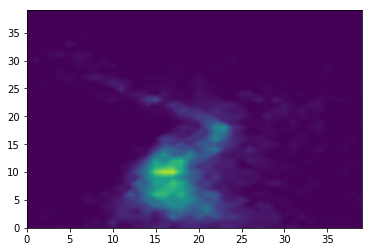

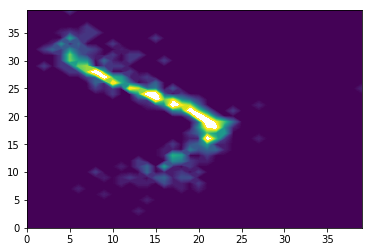

In [7]:
ind_b = ADIST>0.025
RA_B = RA[ind_b]
DEC_B = DEC[ind_b]
mag1 = MAG336[ind_b]
mag2 = MAG438[ind_b]
clc12 = mag1-mag2
T_Bg, xedges, yedges = np.histogram2d(mag2,clc12,bins=( np.linspace(16,26,41),np.linspace(-1,1,41)))
T_Bg = T_Bg*1.0/np.sum(T_Bg)
plt.contourf(T_Bg[::-1,:],levels=np.linspace(0,0.015,101))
plt.show()

ind_T = ADIST<0.002
RA_T = RA[ind_T]
DEC_T = DEC[ind_T]
mag1T = MAG336[ind_T]
mag2T = MAG438[ind_T]
clc12T = mag1T-mag2T
T_T, xedges, yedges = np.histogram2d(mag2T,clc12T,bins=( np.linspace(16,26,41),np.linspace(-1,1,41)))
T_T = T_T*1.0/np.sum(T_T)
plt.contourf(T_T[::-1,:],levels=np.linspace(0,0.015,101))
plt.show()

In [8]:
min_ra,max_ra = 77.125,77.3
min_dec,max_dec = -68.8,-68.725
nbin = 40
stp_ra = (max_ra-min_ra)/nbin
stp_dec = (max_dec-min_dec)/nbin
mf = np.zeros((nbin,nbin))
cmf = np.zeros((nbin,nbin))
for i in range(0,nbin):
    dec_sc = min_dec+stp_dec/2+stp_dec*i
    for j in range(0,nbin):
        ra_sc = min_ra+stp_ra/2+stp_ra*j
        inds = (np.abs(RA-ra_sc)<stp_ra/2) & (np.abs(DEC-dec_sc)<stp_dec/2)
        mag1a = MAG336[inds]
        mag2a = MAG438[inds]
        clc12a = mag1a-mag2a
        T_a, xedges, yedges = np.histogram2d(mag2a,clc12a,bins=( np.linspace(16,26,41),np.linspace(-1,1,41)))
        if np.sum(T_a)>0:
            ssBg = T_Bg*np.sum(T_a)
            mf[i,j],cmf[i,j] = fd.Matched_filter(T_a,T_T,ssBg,\
                                    binsize=[0.025,0.25])

In [9]:
print(np.shape(mf))
print(len(xedges),len(yedges))

(40, 40)
41 41


44579.7976326 -0.627894524568
3640.96735819 -1.0
0.0 0.0


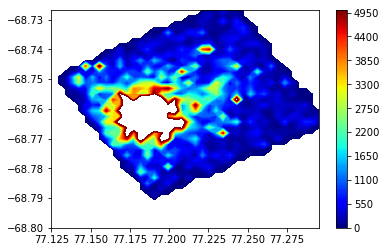

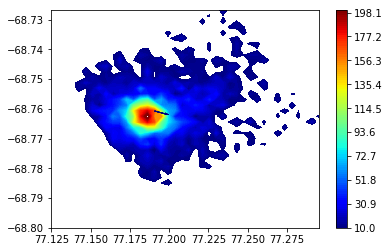

[-68.8      -68.798125 -68.79625  -68.794375 -68.7925   -68.790625
 -68.78875  -68.786875 -68.785    -68.783125 -68.78125  -68.779375 -68.7775
 -68.775625 -68.77375  -68.771875 -68.77     -68.768125 -68.76625
 -68.764375 -68.7625   -68.760625 -68.75875  -68.756875 -68.755    -68.753125
 -68.75125  -68.749375 -68.7475   -68.745625 -68.74375  -68.741875 -68.74
 -68.738125 -68.73625  -68.734375 -68.7325   -68.730625 -68.72875
 -68.726875 -68.725   ]


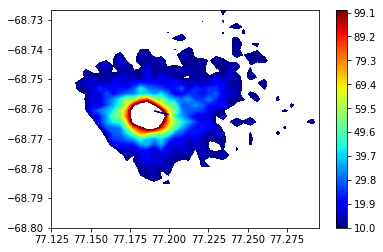

In [10]:
print(np.max(mf),np.min(mf))
print(np.max(cmf),np.min(cmf))
print(np.max(T_a),np.min(T_a))
ind = MAG438<22
n_a, xedges, yedges = np.histogram2d(RA[ind],DEC[ind],bins=( np.linspace(min_ra,max_ra,41),np.linspace(min_dec,max_dec,41)))

plt.contourf(xedges[:len(xedges)-1],yedges[:len(yedges)-1],mf[:,:],vmin = 0,vmax = 5e3,\
levels=np.linspace(0,5e3,101),cmap='jet')
plt.colorbar()
plt.show()
sNA = sn.gaussian_filter(n_a.T,sigma=(0.5,0.5),order=0)
plt.contourf(xedges[:len(xedges)-1],yedges[:len(yedges)-1],n_a.T,cmap='jet',vmin=10,vmax=200,\
             levels=np.linspace(10,200,101))
# plt.contourf(xedges[:len(xedges)-1],yedges[:len(yedges)-1],sNA,cmap='jet',vmin=10,vmax=100,\
#              levels=np.linspace(10,100,101))
plt.colorbar()
plt.quiver([ra_c],[dec_c],[ra_LMC-ra_c]*10,[dec_LMC-dec_c]*10,[10],width=0.003,alpha=.85,cmap='jet')\
#,levels=np.linspace(0,100,101))
# plt.colorbar()
plt.show()
print(yedges)


sNA = sn.gaussian_filter(n_a.T,sigma=(0.5,0.5),order=0)
# plt.contourf(xedges[:len(xedges)-1],yedges[:len(yedges)-1],n_a.T,cmap='jet',vmin=10,vmax=200,\
#              levels=np.linspace(10,200,101))
plt.contourf(xedges[:len(xedges)-1],yedges[:len(yedges)-1],sNA,cmap='jet',vmin=10,vmax=100,\
             levels=np.linspace(10,100,101))
plt.colorbar()
plt.quiver([ra_c],[dec_c],[ra_LMC-ra_c]*10,[dec_LMC-dec_c]*10,[10],width=0.003,alpha=.85,cmap='jet')\
#,levels=np.linspace(0,100,101))
# plt.colorbar()
plt.show()

0.0 583.218746573


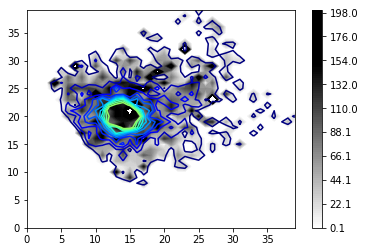

In [19]:
tmpn = n_a.T
mdn = n_a.T*0.0
ind0 = tmpn>10
mdn[ind0] = mf[ind0]/tmpn[ind0]
plt.contourf(mdn,vmin=1,vmax= 150,levels=np.linspace(0.1,200,101),cmap='binary')
plt.colorbar()
plt.contour(n_a.T,cmap='jet',vmin=10,vmax=200,\
             levels=np.linspace(10,110,11))
print(np.min(mdn),np.max(mdn))